<div align="center"><h1>NEPAL EARTHQUAKE SEVERITY PREDICTION PROJECT</h1></div>

<div align="center">
    <img src="https://i1.wp.com/www.circleofblue.org/wp-content/uploads/2015/05/NepalBuilding-1.jpg?fit=1000%2C667&ssl=1" alt="Image 1" style="width: 600px; margin-right: 5px;">
    <img src="https://media.wired.com/photos/5954914c5578bd7594c465df/master/pass/AP_402798867181.jpg" alt="Image 2" style="width: 600px; margin-left: 10px;">
</div>


#### The Project will seek to :
 - Clean the data
 - Explore the available data
 - Pre-process for modelling
  - Fit  Logistic, Decison Tree ,Random Forest
  - Evaluate the fitted Models and choose the best based on the accuracy score

#### Importing Necessary Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv   #for loading the environment file
load_dotenv('nepal_proj.env')   #Loading the .env files
from sklearn.model_selection import train_test_split, GridSearchCV  #Splitting
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, ConfusionMatrixDisplay
from matplotlib.colors import LinearSegmentedColormap


#### Loading the Data
The data is loaded from a Folder in my local machine

##### Tables in my folder
To begin I will get tables in my folder before exploring each to determine the tables we will need for our prediction
I will build up a wrangle function that will be used to load and transform the data

In [2]:
load_dotenv('nepal_proj.env')
def data_wrangler(folder_path):
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            table_name = os.path.splitext(file)[0]
            print(table_name)

dir_path = os.environ.get('data_folder_path')

data_wrangler(dir_path)

csv_building_damage_assessment
csv_building_ownership_and_use
csv_building_structure
csv_household_demographics
csv_household_earthquake_impact
csv_household_resources
csv_individual_demographics
mapping
ward_vdcmun_district_name_mapping


We have Various table and now we can explore each

In [ ]:
load_dotenv('nepal_proj.env')
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_1 = csv_tables[0]
    table_name = os.path.splitext(file_1)[0]
    file_path = os.path.join(folder_path, file_1)
    df = pd.read_csv(file_path)
    return df,table_name

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file


# Set display options to show all columns and their data types
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df, name = data_wrangler(dir_path)
print(name)
#Top 5 rows of the
df.head()

df.info()

print(name)


C:\Users\USER\AppData\Local\Temp\ipykernel_3652\3586959836.py:7: DtypeWarning: Columns (34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


csv_building_damage_assessment
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 55 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   building_id                                           762106 non-null  float64
 1   district_id                                           762106 non-null  int64  
 2   vdcmun_id                                             762106 non-null  int64  
 3   ward_id                                               762106 non-null  int64  
 4   damage_overall_collapse                               428934 non-null  object 
 5   damage_overall_leaning                                270616 non-null  object 
 6   damage_overall_adjacent_building_risk                 105527 non-null  object 
 7   damage_foundation_severe                              53631 non-null   object 
 8   damage_founda

From the csv_building_damage_assessment table above it seems we might not need all cols. Col of interest will be damage_grade and the IDs columns to connct the table to other tables

In [ ]:
load_dotenv('nepal_proj.env')
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_1 = csv_tables[2]
    table_name = os.path.splitext(file_1)[0]
    file_path = os.path.join(folder_path, file_1)
    df = pd.read_csv(file_path)
    return df,table_name

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file


# Set display options to show all columns and their data types
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df, name = data_wrangler(dir_path)
#Top 5 rows of the

print(name)
df.head()

csv_building_structure


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

above  building structrue table seems to be a very useful data to model damage severity

In [ ]:
load_dotenv('nepal_proj.env')
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_1 = csv_tables[3]
    table_name = os.path.splitext(file_1)[0]
    file_path = os.path.join(folder_path, file_1)
    df = pd.read_csv(file_path)
    return df,table_name

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file


# Set display options to show all columns and their data types
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df, name = data_wrangler(dir_path)
#Top 5 rows of the

print(name)
df.head()

csv_household_demographics


,household_id,district_id,vdcmun_id,ward_id,gender_household_head,age_household_head,caste_household,education_level_household_head,income_level_household,size_household,is_bank_account_present_in_household
0,12010100001101,12,1207,120703,Male,31.0,Rai,Illiterate,Rs. 10 thousand,3.0,0.0
1,12010100002101,12,1207,120703,Female,62.0,Rai,Illiterate,Rs. 10 thousand,6.0,0.0
2,12010100003101,12,1207,120703,Male,51.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,13.0,0.0
3,12010100004101,12,1207,120703,Male,48.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,5.0,0.0
4,12010100005101,12,1207,120703,Male,70.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,8.0,0.0


Even the household demographics can be of use in predicting the damage severity.  ...things like education level, income level can influence damage severity

Having looked at the tables ..let us focus on building structure table as a starting point

In [ ]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)
    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


In [ ]:
#Inspecting the data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

##### Data Cleaning
Now that we have identified the table, let's clean and prepare the Data

In [ ]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)
    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

First Thing is to drop the ID cols since they will be of no use in the modelling ..They were to be used in connecting tables

In [ ]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)

    #Dropping all the ID Cols
    drop_cols = [col for col in df.columns if 'id' in col.lower()]

    #Dropping all the unnecessary cols
    df.drop(columns= drop_cols, inplace= True)
    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   count_floors_pre_eq                     762106 non-null  int64 
 1   count_floors_post_eq                    762106 non-null  int64 
 2   age_building                            762106 non-null  int64 
 3   plinth_area_sq_ft                       762106 non-null  int64 
 4   height_ft_pre_eq                        762106 non-null  int64 
 5   height_ft_post_eq                       762106 non-null  int64 
 6   land_surface_condition                  762106 non-null  object
 7   foundation_type                         762106 non-null  object
 8   roof_type                               762106 non-null  object
 9   ground_floor_type                       762106 non-null  object
 10  other_floor_type                        762106 non-null 

Also the post earthquake value will cause leakge in our model ..so we also drop them

In [ ]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)

    #Dropping all the ID Cols
    drop_cols = [col for col in df.columns if 'id' in col.lower()]

    #Dropping cols that might cause leakage in our model
    drop_cols.extend([col for col in df.columns if 'post_eq' in col.lower()])

    #Dropping all the unnecessary cols
    df.drop(columns= drop_cols, inplace= True)
    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   count_floors_pre_eq                     762106 non-null  int64 
 1   age_building                            762106 non-null  int64 
 2   plinth_area_sq_ft                       762106 non-null  int64 
 3   height_ft_pre_eq                        762106 non-null  int64 
 4   land_surface_condition                  762106 non-null  object
 5   foundation_type                         762106 non-null  object
 6   roof_type                               762106 non-null  object
 7   ground_floor_type                       762106 non-null  object
 8   other_floor_type                        762106 non-null  object
 9   position                                762105 non-null  object
 10  plan_configuration                      762105 non-null 

In [ ]:
df['technical_solution_proposed'].head()

0      Major repair
1    Reconstruction
2      Minor repair
3      Minor repair
4      Minor repair
Name: technical_solution_proposed, dtype: object

In [ ]:
df['technical_solution_proposed'].unique()

array(['Major repair', 'Reconstruction', 'Minor repair', 'No need', nan],
      dtype=object)

Even the technical_solution_proposed  seems to be the solution that was proposed after earthquake so we also drop it

In [ ]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)

    #Dropping all the ID Cols
    drop_cols = [col for col in df.columns if 'id' in col.lower()]

    #Dropping cols that might cause leakage in our model
    drop_cols.extend([col for col in df.columns if 'post_eq' in col.lower()])

    #Dropping the technical_suport col it woudl cause leakage
    drop_cols.append('technical_solution_proposed')


    #Dropping all the unnecessary cols
    df.drop(columns= drop_cols, inplace= True)
    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


Now let's clean-up null rows & Cols

In [ ]:
df.isna().sum()

count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_superstructure_bamboo                  0
has_superstructure_rc_non_engineered       0
has_superstructure_rc_engineered           0
has_superstructure_other                   0
damage_gra

we can clean up the null value causing no major impact to our model since we have a large dataset

In [ ]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)

    #Dropping Null rows
    df.dropna(inplace = True)

    #Dropping all the ID Cols
    drop_cols = [col for col in df.columns if 'id' in col.lower()]

    #Dropping cols that might cause leakage in our model
    drop_cols.extend([col for col in df.columns if 'post_eq' in col.lower()])

    #Dropping the technical_suport col it woudl cause leakage
    drop_cols.append('technical_solution_proposed')


    #Dropping all the unnecessary cols
    df.drop(columns= drop_cols, inplace= True)
    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


In [ ]:
df.isna().sum()

count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
damage_grade                    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 0 to 762105
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   count_floors_pre_eq                     762094 non-null  int64 
 1   age_building                            762094 non-null  int64 
 2   plinth_area_sq_ft                       762094 non-null  int64 
 3   height_ft_pre_eq                        762094 non-null  int64 
 4   land_surface_condition                  762094 non-null  object
 5   foundation_type                         762094 non-null  object
 6   roof_type                               762094 non-null  object
 7   ground_floor_type                       762094 non-null  object
 8   other_floor_type                        762094 non-null  object
 9   position                                762094 non-null  object
 10  plan_configuration                      762094 non-null  obje

#### Exploratory Analysis and Further Wrangling

We will do visulization of the features to identify important feature for the prediction

In [ ]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)

    #Dropping Null rows
    df.dropna(inplace = True)

    #Dropping all the ID Cols
    drop_cols = [col for col in df.columns if 'id' in col.lower()]

    #Dropping cols that might cause leakage in our model
    drop_cols.extend([col for col in df.columns if 'post_eq' in col.lower()])

    #Dropping the technical_suport col it woudl cause leakage
    drop_cols.append('technical_solution_proposed')


    #Dropping all the unnecessary cols
    df.drop(columns= drop_cols, inplace= True)
    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


<Axes: xlabel='Frequency', ylabel='Damage Grade'>

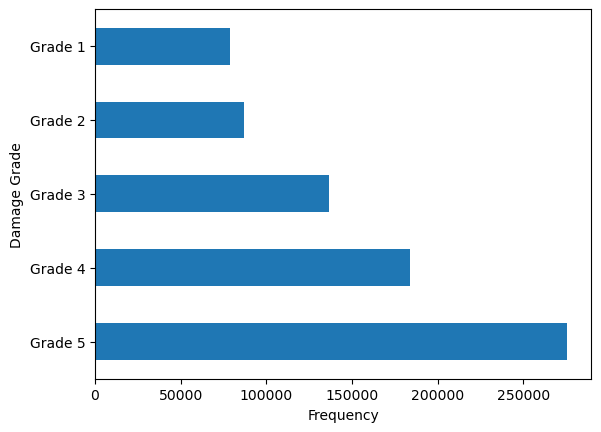

In [ ]:
df['damage_grade'].unique()
df['damage_grade'].value_counts().plot(

    kind = 'barh',
    xlabel = 'Frequency',
    ylabel = 'Damage Grade',
    title = ''
)

Above chat shows we have 5 damage grades.
To make our model much better let's classify the 5 grades into severe or not severe

In [ ]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)



    #Dropping Null rows
    df.dropna(inplace = True)

    #Classifying the damage grade into severe or not
    df['damage_severity'] = df['damage_grade'].apply(lambda x: 1 if int(x[-1]) > 3 else 0)




    #Dropping all the ID Cols
    drop_cols = [col for col in df.columns if 'id' in col.lower()]

    #Dropping cols that might cause leakage in our model
    drop_cols.extend([col for col in df.columns if 'post_eq' in col.lower()])

    #Dropping the technical_suport col it woudl cause leakage
    drop_cols.append('technical_solution_proposed')

    #Drop the damage_grade col
    drop_cols.append('damage_grade')

    #Dropping all the unnecessary cols
    df.drop(columns= drop_cols, inplace= True)


    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


In [ ]:
df.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_severity
0,1,9,288,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,0
1,1,15,364,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,1
2,1,20,384,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,0
3,1,20,312,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,0
4,1,30,308,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,0


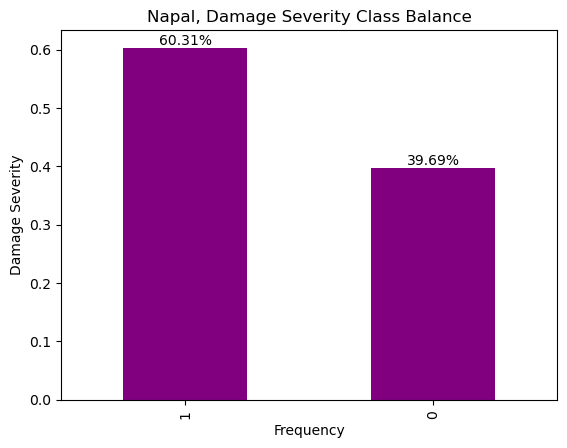

In [ ]:
#Horizontal Bar Chart
df['damage_severity'].value_counts(normalize= True).plot(

    kind = 'bar',
    xlabel = 'Frequency',
    ylabel = 'Damage Severity',
    title = 'Napal, Damage Severity Class Balance',
    color = 'purple'
)

#Adding the data labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() /2., p.get_height()), ha = 'center', va = 'center', xytext= (0,5), textcoords= 'offset points')

plt.show()

In [ ]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 0 to 762105
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   land_surface_condition  762094 non-null  object
 1   foundation_type         762094 non-null  object
 2   roof_type               762094 non-null  object
 3   ground_floor_type       762094 non-null  object
 4   other_floor_type        762094 non-null  object
 5   position                762094 non-null  object
 6   plan_configuration      762094 non-null  object
dtypes: object(7)
memory usage: 46.5+ MB


Checking Cardinality

In [ ]:
df.select_dtypes('object').nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
dtype: int64

None of the categorical features seems to have alarming count og unique values

Next we will seek to understand relation of the categorical features with the target

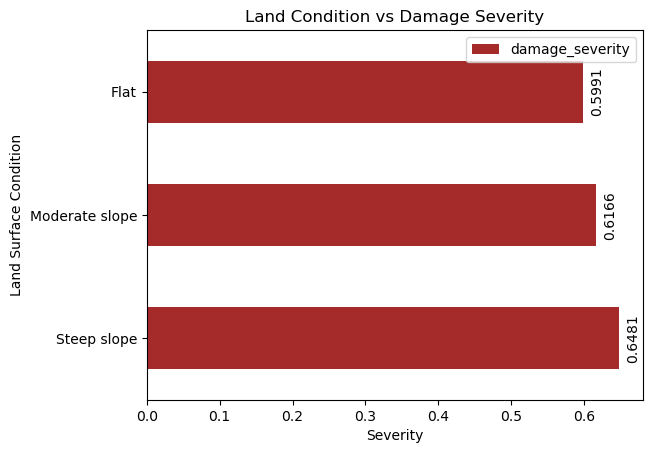

In [ ]:
#Land Surface condition vs damage severeness
land_surface_cond_pt = df.pivot_table(
    index= 'land_surface_condition',
    values= 'damage_severity',
    aggfunc= 'mean'
).sort_values(by= 'damage_severity', ascending= False)

#Plotting
land_surface_cond_pt.plot(
    kind = 'barh',
    xlabel= 'Severity',
    ylabel= 'Land Surface Condition',
    color = 'Brown',
    title= 'Land Condition vs Damage Severity'
)

#adding a data label
ax = plt.gca()
for p in ax.patches:
    ax.annotate(
        f'{p.get_width():.4f}',
        (
            p.get_width(), #X-coordinates for the text
            p.get_y() + p.get_height() / 2 # Y-coordinates

        ),
        ha = 'center',
        va = 'center',
        rotation = 90,
        xytext= (10,0),
        textcoords= 'offset points'
    )
plt.legend()
plt.show()



Steep slope seems to be more affected by the earthquake

Next I will plot the remaing cat feature at once using a for loop


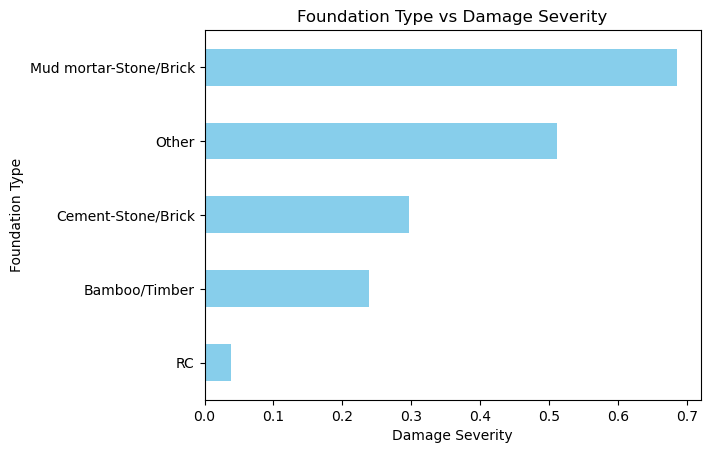

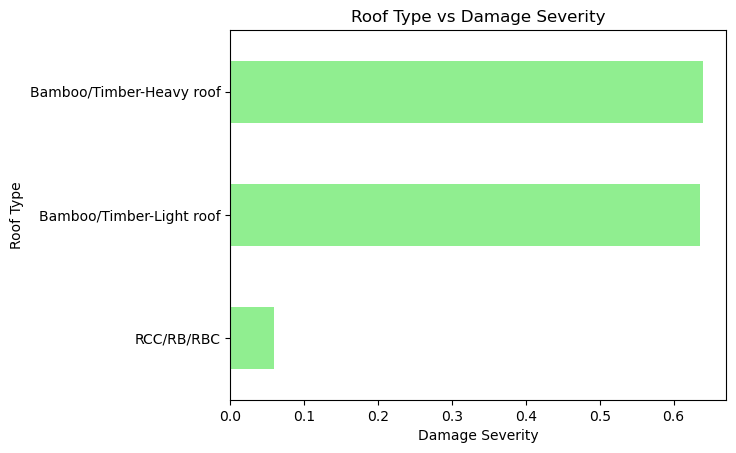

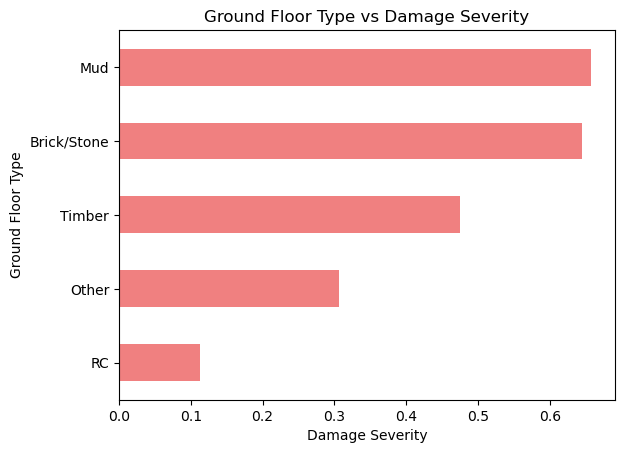

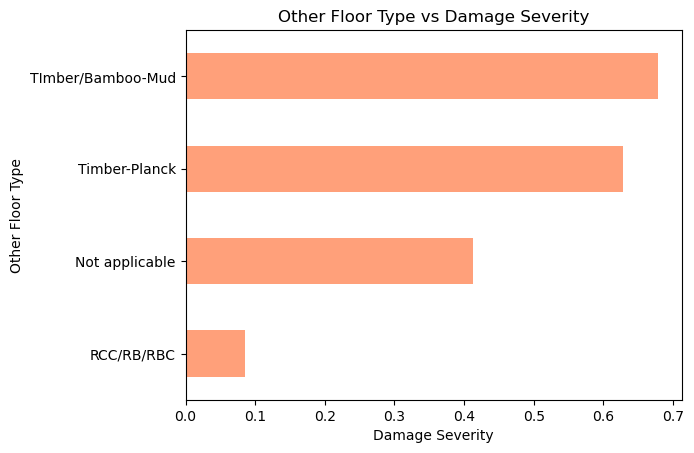

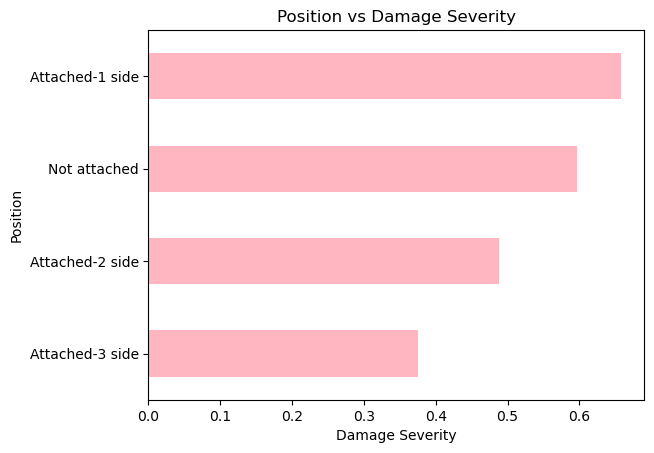

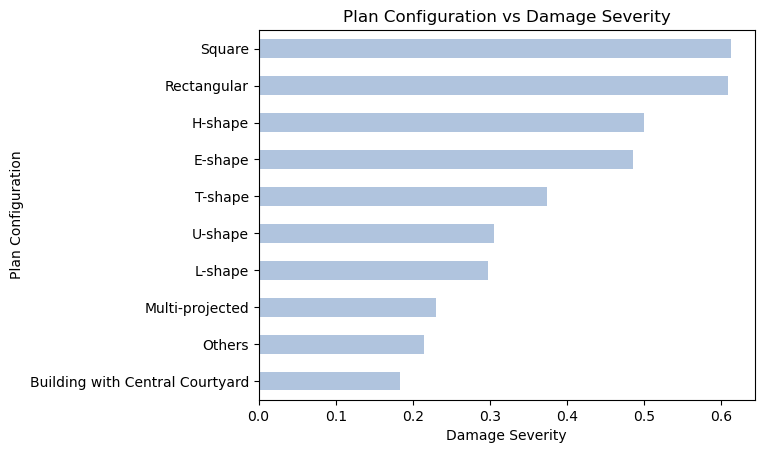

In [ ]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightsteelblue']
cat_cols = list(df.select_dtypes('object').drop(columns= 'land_surface_condition'))
for col in cat_cols:
    #Pivoting the datata by getting mean of severity and index being column in question
    pivot_table = df.pivot_table(
        index= col,
        values= 'damage_severity',
        aggfunc= 'mean'
    ).sort_values(by = 'damage_severity')


    #Plotting
    pivot_table.plot(
        kind = 'barh',
        xlabel= 'Damage Severity',
        ylabel= ' '.join(col.split('_')).title(),
        title = f"{' '.join(col.split('_')).title()} vs Damage Severity",
        color = colors[cat_cols.index(col)],
        legend = False
    )

    # Adding the data labels


Above is a pre-cursor of influence of each categorical variable in our model

Next we explore numerical features

In [ ]:
df.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 0 to 762105
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   count_floors_pre_eq                     762094 non-null  int64
 1   age_building                            762094 non-null  int64
 2   plinth_area_sq_ft                       762094 non-null  int64
 3   height_ft_pre_eq                        762094 non-null  int64
 4   has_superstructure_adobe_mud            762094 non-null  int64
 5   has_superstructure_mud_mortar_stone     762094 non-null  int64
 6   has_superstructure_stone_flag           762094 non-null  int64
 7   has_superstructure_cement_mortar_stone  762094 non-null  int64
 8   has_superstructure_mud_mortar_brick     762094 non-null  int64
 9   has_superstructure_cement_mortar_brick  762094 non-null  int64
 10  has_superstructure_timber               762094 non-null  int64
 11  has_s

In [ ]:
# Correlation Matrix
corr_mat = df.select_dtypes('number').drop(columns= [col for col in df.select_dtypes('number').columns if col.startswith('has')]).corr()

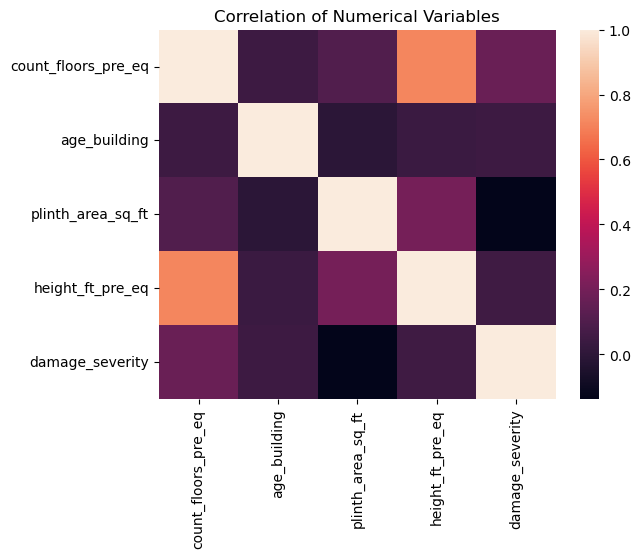

In [ ]:
#Plotting hte correlation martrix
sns.heatmap(
    corr_mat
)
plt.title('Correlation of Numerical Variables')
plt.show()

> It seems there is strong correlation between count of floors and height .This will cause multicolinearlity therefore we should remove one of the varibles.

> The count of floor is more influence to the target than height; therefore, we drop height col

In [30]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)



    #Dropping Null rows
    df.dropna(inplace = True)

    #Classifying the damage grade into severe or not
    df['damage_severity'] = df['damage_grade'].apply(lambda x: 1 if int(x[-1]) > 3 else 0)




    #Dropping all the ID Cols
    drop_cols = [col for col in df.columns if 'id' in col.lower()]

    #Dropping cols that might cause leakage in our model
    drop_cols.extend([col for col in df.columns if 'post_eq' in col.lower()])

    #Dropping the technical_suport col it woudl cause leakage
    drop_cols.append('technical_solution_proposed')

    #Drop the damage_grade  col
    drop_cols.append('damage_grade')

    # Dropping the height col due to multicollinearity
    drop_cols.append('height_ft_pre_eq')

    #Dropping all the unnecessary cols
    df.drop(columns= drop_cols, inplace= True)


    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 0 to 762105
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   count_floors_pre_eq                     762094 non-null  int64 
 1   age_building                            762094 non-null  int64 
 2   plinth_area_sq_ft                       762094 non-null  int64 
 3   land_surface_condition                  762094 non-null  object
 4   foundation_type                         762094 non-null  object
 5   roof_type                               762094 non-null  object
 6   ground_floor_type                       762094 non-null  object
 7   other_floor_type                        762094 non-null  object
 8   position                                762094 non-null  object
 9   plan_configuration                      762094 non-null  object
 10  has_superstructure_adobe_mud            762094 non-null  int6

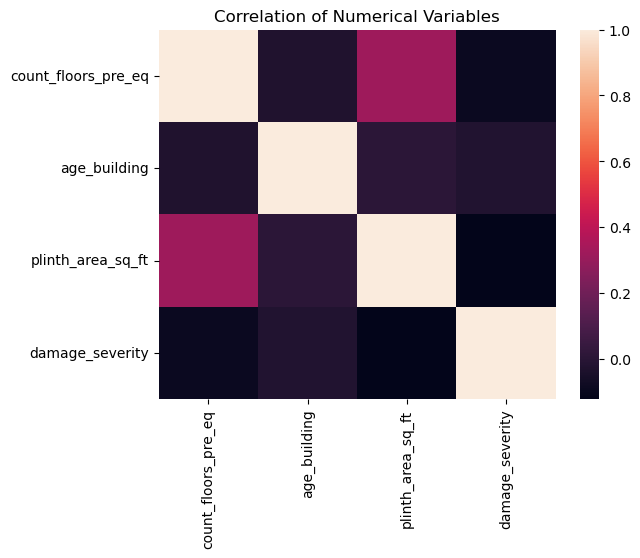

In [6]:
# Correlation Matrix
corr_mat = df.select_dtypes('number').drop(columns= [col for col in df.select_dtypes('number').columns if col.startswith('has')]).corr()

#Plotting hte correlation martrix
sns.heatmap(
    corr_mat
)
plt.title('Correlation of Numerical Variables')
plt.show()

Now Having explored and cleaned our data we move into modelling

#### Modelling

##### Splitting the Data

In [32]:
target = 'damage_severity'
y= df[target]  #The Target
X= df.drop(columns= target)  #The Features

#Splitting using a random splitter traim_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

##### Fitting the model
We will use OrdinalEncoder to encoder the categorical features .
make_pipeline will be used

In [36]:
params = {'C': 0.01,
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'saga'}
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    StandardScaler(),
    LogisticRegression(random_state=42, **params)
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, random_state=42, solver='saga'))])

##### Evaluating the Model


In [38]:
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc_score:.2%}')

Accuracy Score: 73.06%


In [39]:
clas_report = classification_report(y_test, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.81      0.42      0.56     60765
           1       0.71      0.93      0.81     91654

    accuracy                           0.73    152419
   macro avg       0.76      0.68      0.68    152419
weighted avg       0.75      0.73      0.71    152419



>>It seems our logistic model is not doing so well ..this probably due to:
    - Class imbalance
    - So many features 
    - huge data set 

> Let's try reducing the feature and see the effect


In [3]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)



    #Dropping Null rows
    df.dropna(inplace = True)

    #Classifying the damage grade into severe or not
    df['damage_severity'] = df['damage_grade'].apply(lambda x: 1 if int(x[-1]) > 3 else 0)




    #Dropping all the ID Cols
    drop_cols = [col for col in df.columns if 'id' in col.lower()]

    #Dropping cols that might cause leakage in our model
    drop_cols.extend([col for col in df.columns if 'post_eq' in col.lower()])

    #Dropping the technical_suport col it woudl cause leakage
    drop_cols.append('technical_solution_proposed')

    #Drop the damage_grade  col
    drop_cols.append('damage_grade')

    # Dropping the height col due to multicollinearity
    drop_cols.append('height_ft_pre_eq')

    #Removing the already encoded features 
    drop_cols.extend([col for col in df.columns if col.startswith('has')])

    #Dropping all the unnecessary cols
    df.drop(columns= drop_cols, inplace= True)


    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 0 to 762105
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   count_floors_pre_eq     762094 non-null  int64 
 1   age_building            762094 non-null  int64 
 2   plinth_area_sq_ft       762094 non-null  int64 
 3   land_surface_condition  762094 non-null  object
 4   foundation_type         762094 non-null  object
 5   roof_type               762094 non-null  object
 6   ground_floor_type       762094 non-null  object
 7   other_floor_type        762094 non-null  object
 8   position                762094 non-null  object
 9   plan_configuration      762094 non-null  object
 10  damage_severity         762094 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 69.8+ MB


In [45]:
#Splitting
target = 'damage_severity'
y= df[target]  #The Target
X= df.drop(columns= target)  #The Features

#Splitting using a random splitter traim_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

params = {'C': 0.01,
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'saga'}
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [46]:
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc_score:.2%}')

Accuracy Score: 71.92%


In [44]:
clas_report = classification_report(y_test, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.81      0.38      0.52     60765
           1       0.70      0.94      0.80     91654

    accuracy                           0.72    152419
   macro avg       0.76      0.66      0.66    152419
weighted avg       0.74      0.72      0.69    152419



Reducing features makes the model even worse ..Let's try sampling the data instead of using hte entire data set

In [24]:
def data_wrangler(folder_path):
    csv_tables = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    file_3 = csv_tables[2]
    # table_name = os.path.splitext(file_3)[0]
    file_path = os.path.join(folder_path, file_3)
    df = pd.read_csv(file_path)



    #Dropping Null rows
    df.dropna(inplace = True)

    #Classifying the damage grade into severe or not
    df['damage_severity'] = df['damage_grade'].apply(lambda x: 1 if int(x[-1]) > 3 else 0)




    #Dropping all the ID Cols
    drop_cols = [col for col in df.columns if 'id' in col.lower()]

    #Dropping cols that might cause leakage in our model
    drop_cols.extend([col for col in df.columns if 'post_eq' in col.lower()])

    #Dropping the technical_suport col it woudl cause leakage
    drop_cols.append('technical_solution_proposed')

    #Drop the damage_grade  col
    drop_cols.append('damage_grade')

    # Dropping the height col due to multicollinearity
    drop_cols.append('height_ft_pre_eq')

    #Dropping all the unnecessary cols
    df.drop(columns= drop_cols, inplace= True)


    return df

dir_path = os.environ.get('data_folder_path')  #Getting the folder Path from the .env file

df = data_wrangler(dir_path)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 0 to 762105
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   count_floors_pre_eq                     762094 non-null  int64 
 1   age_building                            762094 non-null  int64 
 2   plinth_area_sq_ft                       762094 non-null  int64 
 3   land_surface_condition                  762094 non-null  object
 4   foundation_type                         762094 non-null  object
 5   roof_type                               762094 non-null  object
 6   ground_floor_type                       762094 non-null  object
 7   other_floor_type                        762094 non-null  object
 8   position                                762094 non-null  object
 9   plan_configuration                      762094 non-null  object
 10  has_superstructure_adobe_mud            762094 non-null  int6

In [26]:
#Splitting
target = 'damage_severity'
y= df[target]  #The Target
X= df.drop(columns= target)  #The Features

#Splitting using a random splitter traim_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [27]:
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc_score:.2%}')

Accuracy Score: 73.06%


None of the ways seems to be improving our model. Now let's try other models like decision tree and random forest

##### Fitting Decision Tree 

In [56]:
model_dt = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    StandardScaler(),
    DecisionTreeClassifier(random_state= 42, max_depth= 10)
)
model_dt.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [57]:
y_pred = model_dt.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc_score:.2%}')

Accuracy Score: 72.95%


Even Decision Tree looks not that good model for our data.  Let's Try Random Forest

##### Fitting RandomForest

In [58]:
model_rf = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    StandardScaler(),
    RandomForestClassifier(random_state= 42)
)
model_rf.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [59]:
y_pred = model_rf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc_score:.2%}')

Accuracy Score: 69.50%


##### Tuning the random Forest Model

In [ ]:
#Splitting
target = 'damage_severity'
y= df[target]  #The Target
X= df.drop(columns= target)  #The Features

#Splitting using a random splitter traim_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

model_rf = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    StandardScaler(),
    RandomForestClassifier(random_state= 42)
)
params_grid = {
    'randomforestclassifier__n_estimators' : range(100, 500, 100),
    'randomforestclassifier__max_depth': [5, 10, 20, 30 ,None],
    # 'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__class_weight': [None, 'balanced', {0: 1, 1: 10}]

}


grid_search_rf = GridSearchCV(
    estimator= model_rf,
    param_grid= params_grid,
    cv= 5,
    scoring= 'accuracy'
)

grid_search_rf.fit(X_train, y_train)


After running the tunig using colab The best params are :   
    {'randomforestclassifier__bootstrap': False,   
    'randomforestclassifier__class_weight': None,   
    'randomforestclassifier__max_depth': 10,    
    'randomforestclassifier__n_estimators': 200}   

We Then Fit a RandomForestClassifier   using those params 

##### Final Model Fitted

In [28]:
params = {'bootstrap': False,
 'class_weight': None,
 'max_depth': 10,
 'n_estimators': 200}

model_rf = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    StandardScaler(),
    RandomForestClassifier(random_state= 42, **params)
)

model_rf.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        n_estimators=200, random_state=42))])

In [29]:
y_pred = model_rf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc_score:.2%}')


Accuracy Score: 73.46%


In [60]:
clas_report = classification_report(y_test, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.84      0.41      0.55     60765
           1       0.71      0.95      0.81     91654

    accuracy                           0.73    152419
   macro avg       0.77      0.68      0.68    152419
weighted avg       0.76      0.73      0.71    152419



#### Visualizing the Results

##### Importance df

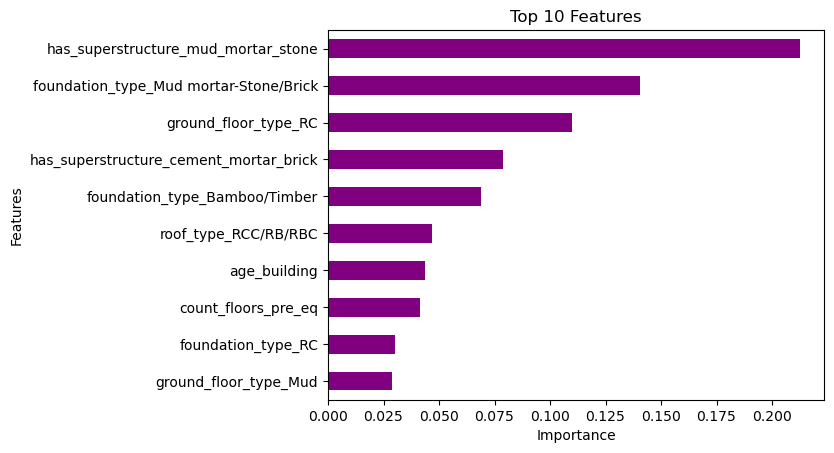

In [51]:
importance = model_rf[2].feature_importances_
feature_names = list(OneHotEncoder(use_cat_names = True).fit_transform(X_train).columns)
# Creating a feature df
feat_importance_df = pd.DataFrame(
    {
        'Importance' : importance
    },
    index = feature_names
).sort_values(by = 'Importance').tail(10)


feat_importance_df.plot(
    kind = 'barh',
    xlabel = 'Importance',
    ylabel = 'Features',
    title = 'Top 10 Features',
    color = 'purple',
    legend = False

)
plt.show()

##### Confusion Matrix

<Figure size 1000x600 with 0 Axes>

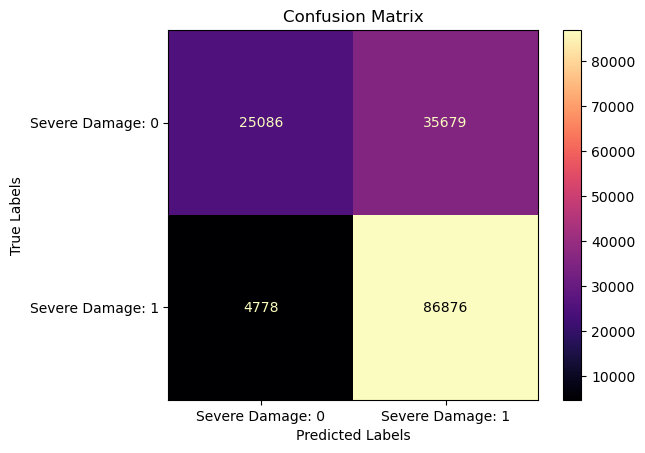

In [70]:
#Plotting the Confusion Matrix
confus_mat = confusion_matrix(y_test, y_pred)
class_names = ['Severe Damage: 0', 'Severe Damage: 1']

#Fig Size
plt.figure(figsize = (10, 6))
#Creating the Display Object
disp = ConfusionMatrixDisplay(
    confusion_matrix = confus_mat,
    display_labels = class_names
)

#Plotting the confusion matrix with labels

disp.plot(cmap = plt.cm.magma)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### Classification Report

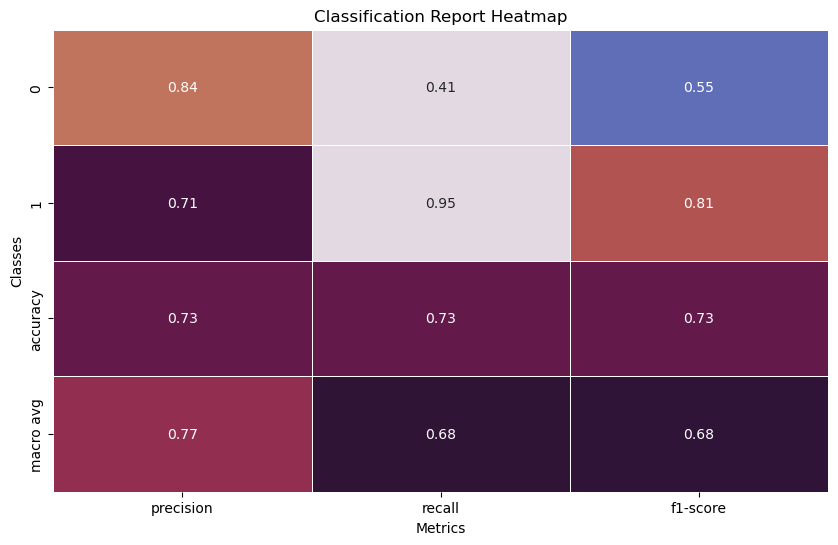

In [68]:
#Generating the Report
class_report = classification_report(y_test, y_pred, output_dict = True)

#Convert the CR to a df
df_report = pd.DataFrame(class_report).transpose()

#Plotting the report
plt.figure(figsize = (10, 6))
sns.heatmap(df_report.iloc[:-1,:-1], annot = True, cmap = 'twilight', fmt = '.2f', linewidths = 0.5, cbar = False)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

##### Model Tuning

In [20]:
#THe model
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    StandardScaler(),
    LogisticRegression(random_state= 42, max_iter= 2000)
)
#Defining the hyperparameter grid
params_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga', 'sag'],
    'logisticregression__class_weight': [None, 'balanced']
}

#Initializing The GridsearchCV
grid_search = GridSearchCV(
    estimator= model_lr,
    param_grid= params_grid,
    cv= 5,
    scoring= 'accuracy',
    n_jobs= 1
)

#Fitting the Model
grid_search.fit(X_train, y_train)

c:\Users\USER\anaconda3\envs\Python_Dev\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\envs\Python_Dev\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\envs\Python_Dev\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\envs\Python_Dev\lib\site-packages\sklearn\base.py", li

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=2000,
                                                           random_state=42))]),
             n_jobs=1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga',
                                                        'sag']},
             scoring='accuracy')

In [23]:
grid_search.best_estimator_

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=2000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

In [24]:
grid_search.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__class_weight': None,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [25]:
grid_search.best_score_

0.75725

In [26]:
y_pred = grid_search.best_estimator_.predict()

TypeError: Pipeline.predict() missing 1 required positional argument: 'X'